<a href="https://colab.research.google.com/github/itisEndymion/DARC/blob/main/CMT318_Lab6_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMT318: Lab 6 - Word Embeddings (Autumn 2024)

In this lab, we will look into how to use different python libraries to:

- Understand synonymy, word similarity, and relatedness using WordNet.
- Construct and analyze term-document matrices and TF-IDF scores.
- Train and evaluate word embeddings.
- Visualize and interpret embeddings using dimensionality reduction.

**IMPORTANT: Save a copy of the notebook before working on it. You can also download it if you prefer**

## 1. Synonymy and Word Similarity

[**WordNet**](https://wordnet.princeton.edu/) is a large lexical database of English designed to model the relationships between words and their meanings. It groups words into sets of synonyms called **synsets**, each representing a distinct concept or meaning. These synsets are interlinked through semantic relationships, creating a network or graph of lexical and conceptual connections.

Some applications of WordNet include:

- Word similarity and relatedness tasks.
- Semantic analysis in natural language processing.
- Word sense disambiguation (choosing the correct meaning of a word in context).
- Language modeling and understanding hierarchical word relationships.

In [ ]:
# If necessary, install NLTK
# !pip install nltk

In [ ]:
import nltk
from nltk.corpus import wordnet

# If necessary, download WordNet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Synonymy with WordNet
word = "car"
synonyms = wordnet.synsets(word)
print(f"Synonyms for '{word}':")
for syn in synonyms[:3]:  # Limit to 3 for brevity
    print(f"- {syn.name()} ({syn.definition()})")

Synonyms for 'car':
- car.n.01 (a motor vehicle with four wheels; usually propelled by an internal combustion engine)
- car.n.02 (a wheeled vehicle adapted to the rails of railroad)
- car.n.03 (the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant)


In [ ]:
# Similarity
car = wordnet.synset('car.n.01')
automobile = wordnet.synset('automobile.n.01')
bus = wordnet.synset('bus.n.01')

similarity_score = car.path_similarity(automobile)
print(f"\nSimilarity between 'car' and 'automobile': {similarity_score}")

similarity_score = car.path_similarity(bus)
print(f"Similarity between 'car' and 'bus': {similarity_score}")


Similarity between 'car' and 'automobile': 1.0
Similarity between 'car' and 'bus': 0.125


[**WordSim353**](http://alfonseca.org/eng/research/wordsim353.html) is a benchmark dataset commonly used to evaluate word similarity and relatedness measures. It contains 353 word pairs (e.g., *car-automobile*, *car-road*). Each pair is assigned a human-annotated score (on a scale from 0 to 10) reflecting their similarity or relatedness. These scores are derived from averaging ratings provided by multiple human annotators.

Remember:
- **Similarity**: Words that are closely related in meaning, e.g., *car-automobile*.
- **Relatedness**: Words that are associated but not synonyms, e.g., *car-road*.

WordSim353 is used for:
- Evaluating semantic similarity models (e.g., WordNet, embeddings like Word2Vec or GloVe).
- Comparing computational scores (e.g., cosine similarity) to human judgments using metrics like **Spearman correlation**.

WordSim353 is widely used as a gold standard in computational linguistics for measuring the effectiveness of semantic similarity techniques.

In [ ]:
import pandas as pd

# Load WordSim353 dataset
!wget https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
!unzip wordsim353.zip -d wordsim353

df = pd.read_csv("wordsim353/combined.csv")
df

--2025-05-06 05:44:44--  https://gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving gabrilovich.com (gabrilovich.com)... 173.236.137.139
Connecting to gabrilovich.com (gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K  --.-KB/s    in 0.01s   

2025-05-06 05:44:44 (1.79 MB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: wordsim353/combined.csv  
  inflating: wordsim353/set1.csv     
  inflating: wordsim353/set2.csv     
  inflating: wordsim353/combined.tab  
  inflating: wordsim353/set1.tab     
  inflating: wordsim353/set2.tab     
  inflating: wordsim353/instructions.txt  


,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62
...,...,...,...
348,shower,flood,6.03
349,weather,forecast,8.34
350,disaster,area,6.25
351,governor,office,6.34


## Exercise 1 (20 marks):
Complete the following code to calculate similarity scores for pairs in WordSim353 and evaluate against human judgments.

**NOTE:** There might be some words in WordSim353 for which there's no synset in WordNet. In these cases, you could discard those word pairs from the comparison. If you do so, comment on that, and print how many pairs were actually considered in the analysis.

In [ ]:
# To store the human similarity scores for all word pairs in WordSim353
human_scores = []
# To store the similarity scores for all word pairs according to WordNet
model_scores = []

# COMPLETE: Calculate WordNet similarity scores
skipped_pairs = 0

for _, row in df.iterrows():
    w1, w2 = row["Word 1"], row["Word 2"]
    synsets1 = wordnet.synsets(w1)
    synsets2 = wordnet.synsets(w2)

    if synsets1 and synsets2:
        # Use the first sense of each word
        sim = synsets1[0].path_similarity(synsets2[0])
        if sim is not None:
            model_scores.append(sim)
            human_scores.append(row["Human (mean)"])
        else:
            skipped_pairs += 1
    else:
        skipped_pairs += 1

print(f"Word pairs considered: {len(human_scores)} / {len(df)}")
print(f"Word pairs skipped due to missing synsets: {skipped_pairs}")

# Evaluate correlation
from scipy.stats import spearmanr
correlation, _ = spearmanr(human_scores, model_scores)
print(f"Spearman Correlation between human and WordNet: {correlation:.2f}")

Word pairs considered: 352 / 353
Word pairs skipped due to missing synsets: 1
Spearman Correlation between human and WordNet: 0.20


##2. TF-IDF and Cosine Similarity

Let's compute TF-IDF scores.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample documents
documents = [
    "I love natural language processing.",
    "Computational linguistics is amazing.",
    "Natural language processing helps computers understand humans.",
    "I enjoy studying linguistics and NLP."
]

# TF-IDF
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(documents)
print("\nTF-IDF Matrix:")
print(X_tfidf.toarray())


TF-IDF Matrix:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.46580855 0.         0.59081908 0.46580855
  0.         0.46580855 0.         0.        ]
 [0.52547275 0.         0.52547275 0.         0.         0.
  0.         0.52547275 0.         0.41428875 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.41292788 0.         0.41292788
  0.41292788 0.         0.32555709 0.         0.         0.32555709
  0.         0.32555709 0.         0.41292788]
 [0.         0.46516193 0.         0.         0.46516193 0.
  0.         0.         0.         0.36673901 0.         0.
  0.46516193 0.         0.46516193 0.        ]]


We can use [`cosine_similarity`](https://scikit-learn.org/dev/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) to, given a query, find the most similar document.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Query
query = "I love NLP"

query_vector = tfidf.transform([query])
doc_vectors = tfidf.transform(documents)

# Compute Cosine Similarity
similarities = cosine_similarity(query_vector, doc_vectors)
most_similar_idx = similarities.argmax()

# Display results
print("Most similar document:")
print(documents[most_similar_idx])

Most similar document:
I love natural language processing.


## Exercise 2 (25 marks):

1. Change the vectorizer to `CountVectorizer` (bag of words) and compare results with TF-IDF. You can change the documents and/or query if you wish to showcase the differences in several case (e.g. very similar, very different).
2. Extend the example to show not only the most similar document to the query but the sorted similarity between the query and all documents ([argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) could be useful). The output should look similar to:

```
query: I love NLP

Documents ranked by relevance:
Document 1 (Score: 0.42): I love natural language processing.
Document 4 (Score: 0.33): I enjoy studying linguistics and NLP.
Document 3 (Score: 0.00): Natural language processing helps computers understand humans.
Document 2 (Score: 0.00): Computational linguistics is amazing.
```

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Sample documents
documents = [
    "I love natural language processing.",
    "Computational linguistics is amazing.",
    "Natural language processing helps computers understand humans.",
    "I enjoy studying linguistics and NLP."
]

# Query
query = "I love NLP"

# CountVectorizer (bag of words)
vectorizer = CountVectorizer()
doc_vectors = vectorizer.fit_transform(documents)
query_vector = vectorizer.transform([query])

# Compute cosine similarities
similarities = cosine_similarity(query_vector, doc_vectors).flatten()

# Sort by similarity (descending)
sorted_indices = np.argsort(similarities)[::-1]

# Output
print(f"query:  {query}\n")

for rank, idx in enumerate(sorted_indices, 1):
    print(f"Document {idx + 1} (Score: {similarities[idx]:.2f}): {documents[idx]}")


query:  I love NLP

Document 1 (Score: 0.35): I love natural language processing.
Document 4 (Score: 0.32): I enjoy studying linguistics and NLP.
Document 3 (Score: 0.00): Natural language processing helps computers understand humans.
Document 2 (Score: 0.00): Computational linguistics is amazing.


## 3. Words as Vectors and Skipgram:
We will see how to train a Skip-gram Word2Vec model using [gensim](https://radimrehurek.com/gensim/).


In [ ]:
# Install gensim if not already installed
# !pip install gensim matplotlib scikit-learn

In [ ]:
# Import some necessary libraries
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define a small custom corpus
corpus = [
    ["king", "queen", "man", "woman", "prince", "princess"],
    ["dog", "cat", "animal", "pet", "puppy", "kitten"],
    ["apple", "banana", "orange", "fruit", "vegetable", "carrot"],
    ["car", "bike", "vehicle", "transport", "bus", "train"],
    ["love", "hate", "emotion", "feeling", "joy", "sadness"],
]

# Train Word2Vec model
model = Word2Vec(
    sentences=corpus,
    vector_size=50,  # Dimensionality of word vectors
    window=3,  # Context window size
    sg=1,  # Use skip-gram (1) instead of CBOW (0)
    min_count=1,  # Minimum word frequency
    epochs=100,  # Number of training epochs
    seed=42
)

# View word vectors
print("Vector for 'king':")
print(model.wv['king'])

Vector for 'king':
[-0.00831407 -0.01845202 -0.01824329 -0.0099363   0.00294349 -0.01766487
  0.0191809  -0.00169333 -0.00998348  0.00070694  0.01206919 -0.00739749
 -0.01842579 -0.01795578  0.01476819 -0.01553308  0.00517276 -0.00524364
  0.01156627 -0.01784279  0.01587996  0.00752575 -0.00216721 -0.0117488
  0.01983828 -0.00823167  0.00020947 -0.00473514 -0.01099543 -0.00361102
 -0.01386651 -0.02015125 -0.00865286 -0.01526659 -0.003731    0.01499986
 -0.01383502 -0.02071123 -0.01589291  0.0007004  -0.00842884 -0.00017939
 -0.01840656 -0.00673072 -0.00345183 -0.00341028  0.0024754   0.01160418
 -0.0012921   0.01327871]


Let's visualise the embeddings using [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html).

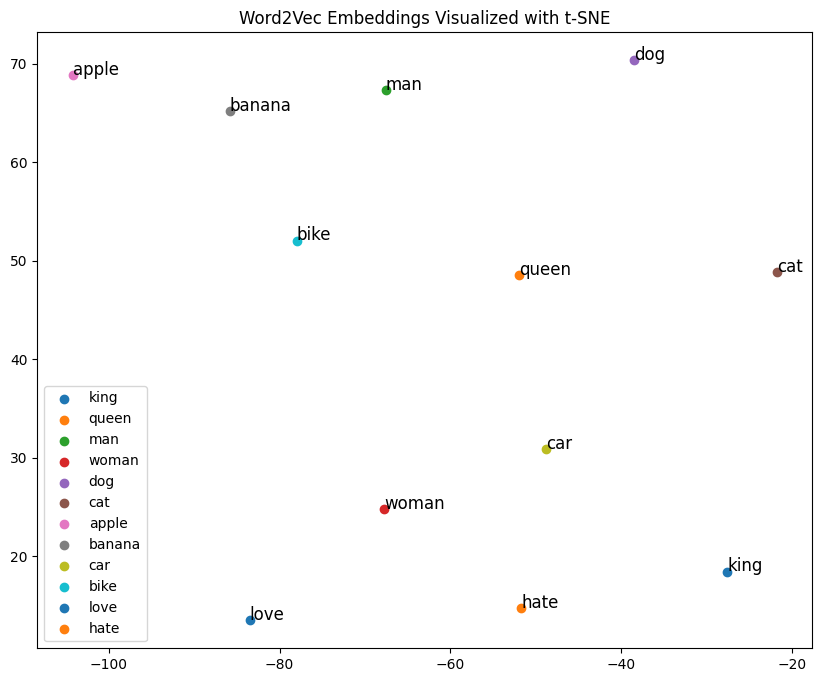

In [ ]:
# Extract embeddings for selected words
words = ["king", "queen", "man", "woman", "dog", "cat", "apple", "banana", "car", "bike", "love", "hate"]
vectors = [model.wv[word] for word in words]
vectors = np.vstack(vectors) # Convert to 2D NumPy array

# Reduce dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5) # Perplexity < n_samples (12)
reduced_vectors = tsne.fit_transform(vectors)

# Step 5: Visualize embeddings
plt.figure(figsize=(10, 8))
for i, word in enumerate(words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y, label=word)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
plt.title("Word2Vec Embeddings Visualized with t-SNE")
plt.legend()
plt.show()

## Exercise 3 (25 marks):

1. Train the Word2Vec model on a larger dataset, such as a collection of sentences from Wikipedia or news articles. You can obtain a dataset from `nltk.corpus` or `HuggingFace Datasets`. Before your code, use a couple of lines describe the corpus you chose.
2. Project the embeddings for the same words we used before, but using the new trained model. Comment on how the new model changes the visualisation.

1.I use the Wikitext-2-raw dataset from Hugging Face, which is a clean collection of English Wikipedia articles.Compared to the small corpus from the previous exercise, this model captures word relationships.

In [ ]:
!pip install datasets
!pip install --upgrade numpy
!pip install --force-reinstall --no-cache-dir gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 87.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 265.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/733k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/6.36M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

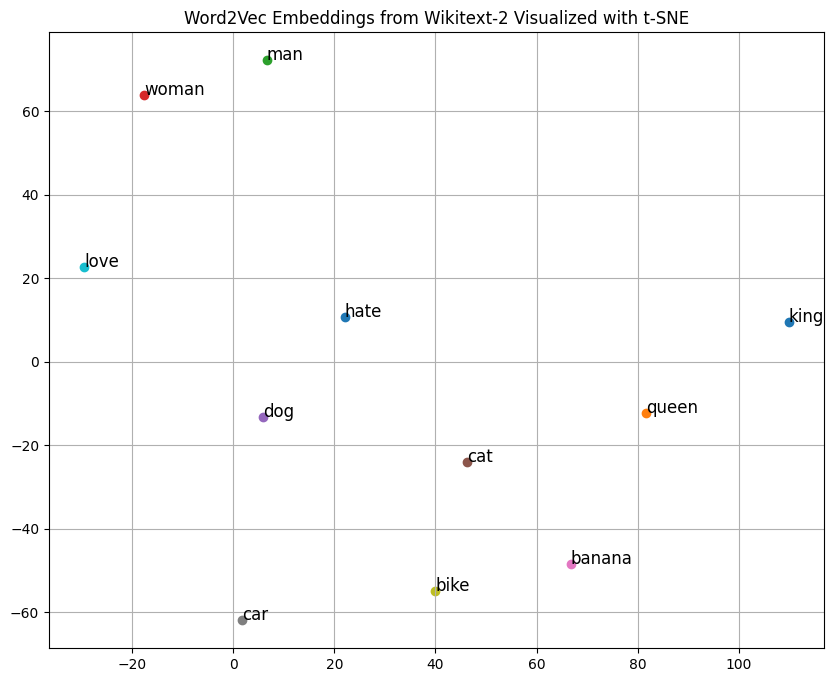

In [ ]:
from datasets import load_dataset
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset from Hugging Face
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")
raw_text = dataset["train"]["text"]

# 2. Tokenize the dataset: each sentence becomes a list of words
sentences = [line.split() for line in raw_text if line.strip() != ""]

# 3. Train Word2Vec model
model = Word2Vec(
    sentences=sentences,
    vector_size=50,
    window=5,
    min_count=5,
    sg=1,
    epochs=5,
    seed=42
)

# 4. Visualize selected embeddings
words = ["king", "queen", "man", "woman", "dog", "cat", "apple", "banana", "car", "bike", "love", "hate"]
filtered_words = [word for word in words if word in model.wv]

vectors = np.vstack([model.wv[word] for word in filtered_words])
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_vectors = tsne.fit_transform(vectors)

# 5. Plot
plt.figure(figsize=(10, 8))
for i, word in enumerate(filtered_words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
plt.title("Word2Vec Embeddings from Wikitext-2 Visualized with t-SNE")
plt.grid(True)
plt.show()



## Exercise 4 (30 marks):
Evaluate the quality of the embeddings from Exercise 3 using the `WordSim353` dataset, similar to how you did in Exercise 1.

1. What's the `spearman` correlation obtained using the new model?
2. How does it compare to the correlation obtained in Exercise 1?
3. What changes would you make to improve the quality of the embeddings trained using word2vec? Include 1 or 2 experiments showcasing these changes and how they affect performance.

In [ ]:
#1.
from scipy.stats import spearmanr
import pandas as pd

# Load WordSim353 dataset
df = pd.read_csv("wordsim353/combined.csv")

human_scores = []
model_scores = []

# Compute similarities using the new Word2Vec model
missing = 0
for _, row in df.iterrows():
    w1, w2 = row['Word 1'], row['Word 2']
    if w1 in model.wv and w2 in model.wv:
        sim = model.wv.similarity(w1, w2)
        model_scores.append(sim)
        human_scores.append(row['Human (mean)'])
    else:
        missing += 1

print(f"Missing word pairs: {missing}/{len(df)}")

# Calculate Spearman correlation
correlation, _ = spearmanr(human_scores, model_scores)
print(f"Correlation: {correlation:.2f}")


Missing word pairs: 62/353
Correlation: 0.34


2.The correlation in Exercise 1 is 0.2 and achieve a higher correlation of 0.34  in Exercise 4.This shows that the Word2Vec model is better at capturing semantic similarity.

3.I increase vector size from 50 to 100 and train for more epochs. This allows the model to capture more nuanced patterns and improve the similarity correlation with human judgments.

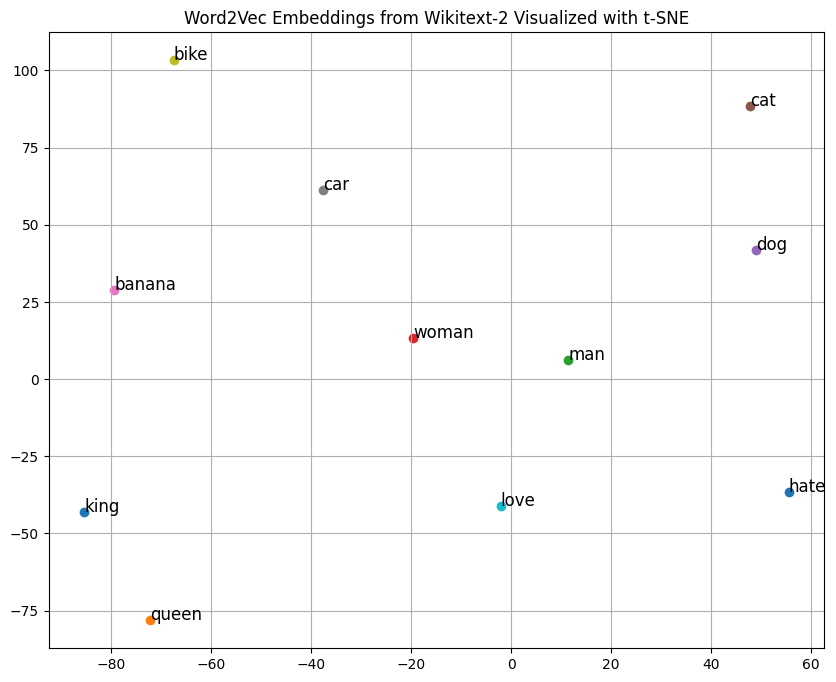

In [ ]:
from datasets import load_dataset
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the dataset from Hugging Face
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")
raw_text = dataset["train"]["text"]

# 2. Tokenize the dataset: each sentence becomes a list of words
sentences = [line.split() for line in raw_text if line.strip() != ""]

# 3. Train Word2Vec model(vector_size increased from 50)
model = Word2Vec(
    sentences=sentences,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    epochs=50,
    seed=42
)

# 4. Visualize selected embeddings
words = ["king", "queen", "man", "woman", "dog", "cat", "apple", "banana", "car", "bike", "love", "hate"]
filtered_words = [word for word in words if word in model.wv]

vectors = np.vstack([model.wv[word] for word in filtered_words])
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_vectors = tsne.fit_transform(vectors)

# 5. Plot
plt.figure(figsize=(10, 8))
for i, word in enumerate(filtered_words):
    x, y = reduced_vectors[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)
plt.title("Word2Vec Embeddings from Wikitext-2 Visualized with t-SNE")
plt.grid(True)
plt.show()
